<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/6_Regresi%C3%B3n_Lineal__Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [344]:
#Cargar archivo csv desde seaborn
df= pd.read_csv("datoslimpioscreta.csv")
df

,source,host_location,host_response_time,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group_cleansed,property_type,room_type,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,city scrape,"Heraklion, Greece",within an hour,"['email', 'phone']",t,t,"Gazi, Greece",Not provided,Entire rental unit,Entire home/apt,...,4.94,4.91,4.96,4.99,4.64,4.92,3,3,0,0.82
1,city scrape,"Matala, Greece",within an hour,"['email', 'phone', 'work_email']",t,t,"Matala, Crete Island, Greece",Not provided,Private room in bed and breakfast,Private room,...,4.14,4.49,4.33,4.43,4.50,4.18,4,0,4,0.26
2,previous scrape,"Chania, Greece",within an hour,"['email', 'phone']",t,t,"Chania, Greece",Not provided,Entire rental unit,Entire home/apt,...,4.71,4.67,4.87,4.84,4.94,4.66,4,4,0,2.12
3,city scrape,Greece,within an hour,"['email', 'phone']",t,t,Not provided,Not provided,Entire rental unit,Entire home/apt,...,4.50,5.00,5.00,4.50,4.00,4.50,1,1,0,0.01
4,city scrape,"Iraklion, Greece",within an hour,"['email', 'phone']",t,t,"Agia Pelagia, Crete, Greece",Not provided,Entire rental unit,Entire home/apt,...,4.87,4.80,4.92,4.94,4.68,4.88,13,10,1,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26159,city scrape,Unknown,within an hour,"['email', 'phone']",t,t,"Chania, Greece",Not provided,Entire condo,Entire home/apt,...,4.90,5.00,5.00,5.00,4.80,4.90,10,10,0,0.30
26160,city scrape,Unknown,within an hour,"['email', 'phone']",t,t,"Chania, Greece",Not provided,Entire condo,Entire home/apt,...,4.90,5.00,5.00,5.00,4.80,4.90,10,10,0,0.30
26161,city scrape,"Rethimno, Greece",within an hour,"['email', 'phone', 'work_email']",t,t,Not provided,Not provided,Entire villa,Entire home/apt,...,4.90,5.00,5.00,5.00,4.80,4.90,86,86,0,0.30
26162,city scrape,Greece,within an hour,"['phone', 'work_email']",t,t,"Mariou, Crete, Greece",Not provided,Entire villa,Entire home/apt,...,4.90,5.00,5.00,5.00,4.80,4.90,13,13,0,0.30


In [345]:
df["room_type"].value_counts()

room_type
Entire home/apt    23539
Private room        2354
Hotel room           253
Shared room           18
Name: count, dtype: int64

In [346]:
Entire_home_apt = df[df["room_type"] == "Entire home/apt"]
Private_room = df[df["room_type"] == "Private room"]
Shared_room = df[df["room_type"] == "Shared room"]
Hotel_room = df[df["room_type"] == "Hotel room"]

In [347]:
Corr_Entire_home_apt = Entire_home_apt.corr(numeric_only=True).abs()
Corr_Private_room = Private_room.corr(numeric_only=True).abs()
Corr_Shared_room = Shared_room.corr(numeric_only=True).abs()        
Corr_Hotel_room = Hotel_room.corr(numeric_only=True).abs()

In [348]:
#CORRELACIONES ENTRE HOST_ACCEPTANCE_RATE Y HOST_RESPONSE_RATE

correlaciones1 = {
    "Entire_home_apt": Entire_home_apt["host_acceptance_rate"].corr(Entire_home_apt["host_response_rate"]),
    "Private_room": Private_room["host_acceptance_rate"].corr(Private_room["host_response_rate"]),
    "Shared_room": Shared_room["host_acceptance_rate"].corr(Shared_room["host_response_rate"]),
    "Hotel_room": Hotel_room["host_acceptance_rate"].corr(Hotel_room["host_response_rate"])
}

tabla_corr = pd.DataFrame.from_dict(correlaciones1, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt     0.311031
Private_room        0.257782
Shared_room         0.889170
Hotel_room          0.196803


In [349]:
#CORRELACIONES ENTRE HOST_ACCEPTANCE_RATE Y PRICE

correlaciones2 = {
    "Entire_home_apt": Entire_home_apt["host_acceptance_rate"].corr(Entire_home_apt["price"]),
    "Private_room": Private_room["host_acceptance_rate"].corr(Private_room["price"]),
    "Shared_room": Shared_room["host_acceptance_rate"].corr(Shared_room["price"]),
    "Hotel_room": Hotel_room["host_acceptance_rate"].corr(Hotel_room["price"])
}

tabla_corr = pd.DataFrame.from_dict(correlaciones2, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt     0.005618
Private_room        0.022356
Shared_room        -0.506079
Hotel_room          0.005750


In [350]:
#CORRELACIONES ENTRE HOST_ACCEPTANCE_RATE Y NUMBER_OF_REVIEWS

correlaciones3 = {
    "Entire_home_apt": Entire_home_apt["number_of_reviews"].corr(Entire_home_apt["host_response_rate"]),
    "Private_room": Private_room["number_of_reviews"].corr(Private_room["host_response_rate"]),
    "Shared_room": Shared_room["number_of_reviews"].corr(Shared_room["host_response_rate"]),
    "Hotel_room": Hotel_room["number_of_reviews"].corr(Hotel_room["host_response_rate"])
}

tabla_corr = pd.DataFrame.from_dict(correlaciones3, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt     0.054918
Private_room        0.049556
Shared_room         0.169376
Hotel_room          0.081260


In [351]:
#CORRELACIONES ENTRE REVIEW_SCORES_RATING Y CALCULATED_HOST_LISTINGS_COUNT

correlaciones4 = {
    "Entire_home_apt": Entire_home_apt["review_scores_rating"].corr(Entire_home_apt["calculated_host_listings_count"]),
    "Private_room": Private_room["review_scores_rating"].corr(Private_room["calculated_host_listings_count"]),
    "Shared_room": Shared_room["review_scores_rating"].corr(Shared_room["calculated_host_listings_count"]),
    "Hotel_room": Hotel_room["review_scores_rating"].corr(Hotel_room["calculated_host_listings_count"])
}

tabla_corr = pd.DataFrame.from_dict(correlaciones4, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt     0.016568
Private_room       -0.041535
Shared_room        -0.263293
Hotel_room         -0.082786


In [352]:
#CORRELACIONES ENTRE AVAILABILITY_365 Y NUMBER_OF_REVIEWS

correlaciones5 = {
    "Entire_home_apt": Entire_home_apt["availability_365"].corr(Entire_home_apt["number_of_reviews"]),
    "Private_room": Private_room["availability_365"].corr(Private_room["number_of_reviews"]),
    "Shared_room": Shared_room["availability_365"].corr(Shared_room["number_of_reviews"]),
    "Hotel_room": Hotel_room["availability_365"].corr(Hotel_room["number_of_reviews"])
}

tabla_corr = pd.DataFrame.from_dict(correlaciones5, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt    -0.012580
Private_room        0.008824
Shared_room         0.468336
Hotel_room         -0.030721


In [353]:
#CORRELACIONES ENTRE REVIEWS_PER_MONTH Y REVIEW_SCORES_COMMUNICATION

correlaciones6 = {
    "Entire_home_apt": Entire_home_apt["reviews_per_month"].corr(Entire_home_apt["review_scores_communication"]),
    "Private_room": Private_room["reviews_per_month"].corr(Private_room["review_scores_communication"]),
    "Shared_room": Shared_room["reviews_per_month"].corr(Shared_room["review_scores_communication"]),
    "Hotel_room": Hotel_room["reviews_per_month"].corr(Hotel_room["review_scores_communication"])
}

tabla_corr = pd.DataFrame.from_dict(correlaciones6, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt     0.056807
Private_room        0.031480
Shared_room        -0.315343
Hotel_room          0.039707


In [354]:
import numpy as np
import pandas as pd

subsets = {
    "Entire_home_apt": Entire_home_apt,
    "Private_room": Private_room,
    "Shared_room": Shared_room,
    "Hotel_room": Hotel_room
}

def top10_corr(df):
    # Solo columnas numéricas
    num = df.select_dtypes(include=[np.number])
    if num.shape[1] < 2:
        return pd.DataFrame(columns=["Variable_1","Variable_2","Abs_Correlación"])
    
    corr = num.corr(method="pearson")
    corr_abs = corr.abs()

    # Eliminar duplicados (triángulo superior + diagonal)
    mask = np.triu(np.ones_like(corr_abs, dtype=bool))
    corr_pairs = corr_abs.mask(mask).stack().sort_values(ascending=False)

    # Tomar las 10 más altas
    top10 = corr_pairs.head(20).reset_index()
    top10.columns = ["Variable_1", "Variable_2", "Abs_Correlación"]
    return top10

# Mostrar las tablas para cada subset
top10_dict = {}
for name, sub in subsets.items():
    print("\n" + "="*80)
    print(f"Top 10 correlaciones absolutas - {name}")
    print("="*80)
    top10 = top10_corr(sub)
    top10_dict[name] = top10
    display(top10)


Top 10 correlaciones absolutas - Entire_home_apt


,Variable_1,Variable_2,Abs_Correlación
0,calculated_host_listings_count_entire_homes,calculated_host_listings_count,0.998813
1,number_of_reviews_ly,number_of_reviews_ltm,0.995216
2,maximum_minimum_nights,minimum_nights,0.976313
3,maximum_nights_avg_ntm,maximum_maximum_nights,0.975280
4,availability_90,availability_60,0.962174
5,maximum_nights_avg_ntm,minimum_maximum_nights,0.957902
6,availability_eoy,availability_365,0.944233
7,availability_60,availability_30,0.925186
8,estimated_occupancy_l365d,number_of_reviews_ltm,0.907964
9,estimated_occupancy_l365d,number_of_reviews_ly,0.905570



Top 10 correlaciones absolutas - Private_room


,Variable_1,Variable_2,Abs_Correlación
0,minimum_nights_avg_ntm,minimum_minimum_nights,0.999570
1,minimum_nights_avg_ntm,maximum_minimum_nights,0.998728
2,maximum_minimum_nights,minimum_minimum_nights,0.997367
3,number_of_reviews_ly,number_of_reviews_ltm,0.997316
4,maximum_nights_avg_ntm,maximum_maximum_nights,0.991538
5,availability_90,availability_60,0.964729
6,maximum_nights_avg_ntm,minimum_maximum_nights,0.964054
7,availability_eoy,availability_365,0.959603
8,estimated_occupancy_l365d,number_of_reviews_ly,0.953376
9,estimated_occupancy_l365d,number_of_reviews_ltm,0.953169



Top 10 correlaciones absolutas - Shared_room


,Variable_1,Variable_2,Abs_Correlación
0,maximum_maximum_nights,minimum_maximum_nights,1.000000
1,maximum_nights_avg_ntm,maximum_maximum_nights,1.000000
2,maximum_nights_avg_ntm,minimum_maximum_nights,1.000000
3,estimated_occupancy_l365d,number_of_reviews_ltm,1.000000
4,availability_90,availability_60,0.999856
5,availability_eoy,availability_30,0.998579
6,maximum_nights_avg_ntm,maximum_nights,0.998132
7,minimum_maximum_nights,maximum_nights,0.998132
8,maximum_maximum_nights,maximum_nights,0.998132
9,availability_60,availability_30,0.997929



Top 10 correlaciones absolutas - Hotel_room


,Variable_1,Variable_2,Abs_Correlación
0,minimum_nights_avg_ntm,minimum_minimum_nights,0.999886
1,minimum_nights_avg_ntm,maximum_minimum_nights,0.999653
2,maximum_minimum_nights,minimum_minimum_nights,0.999335
3,number_of_reviews_ly,number_of_reviews_ltm,0.998660
4,maximum_nights_avg_ntm,maximum_maximum_nights,0.991627
5,estimated_occupancy_l365d,number_of_reviews_ltm,0.982684
6,estimated_occupancy_l365d,number_of_reviews_ly,0.982019
7,calculated_host_listings_count,host_listings_count,0.977720
8,availability_90,availability_60,0.959526
9,maximum_nights_avg_ntm,minimum_maximum_nights,0.959290


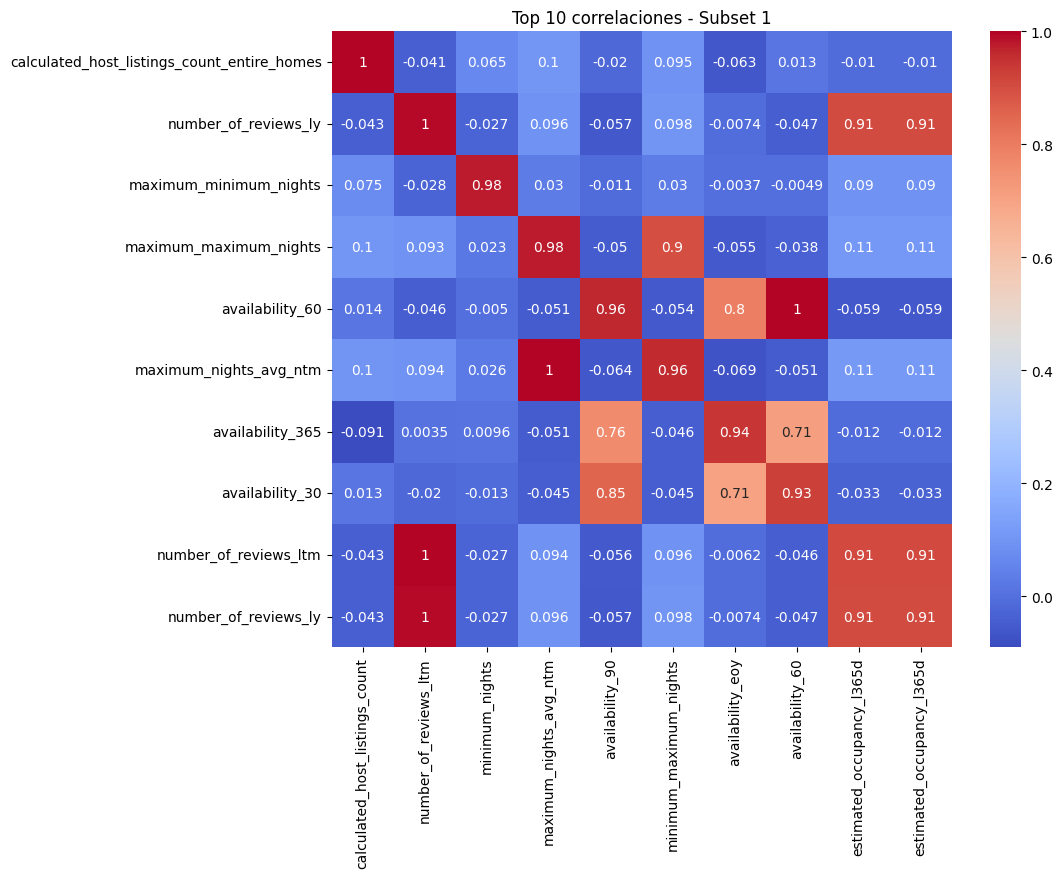

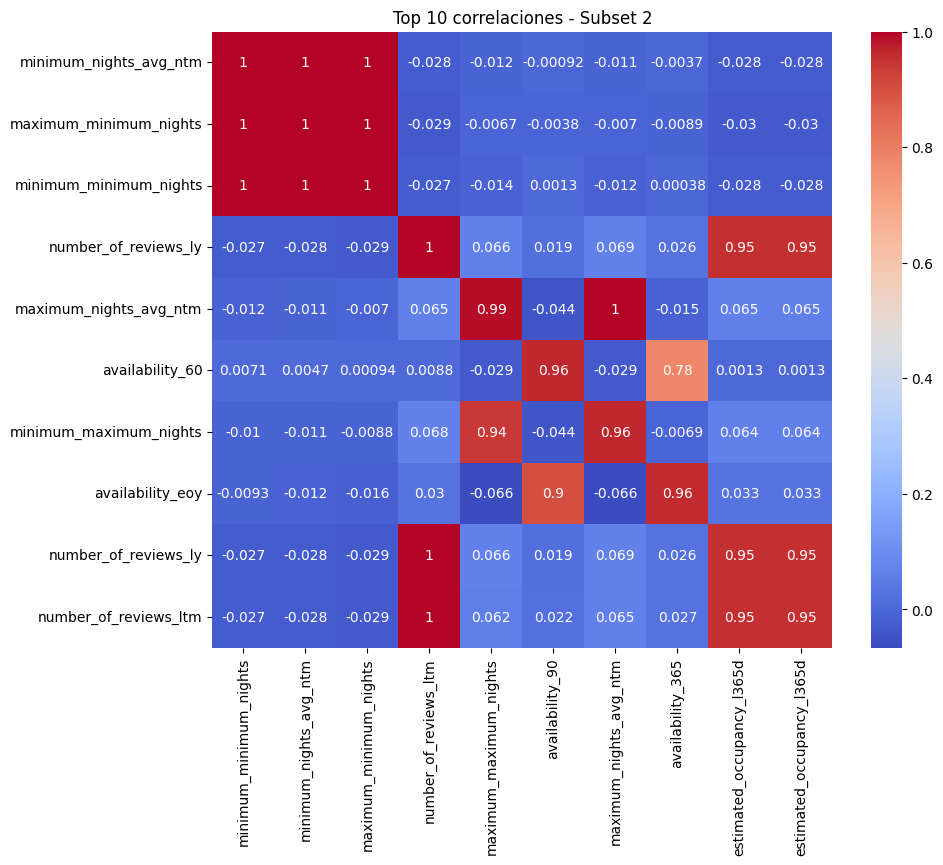

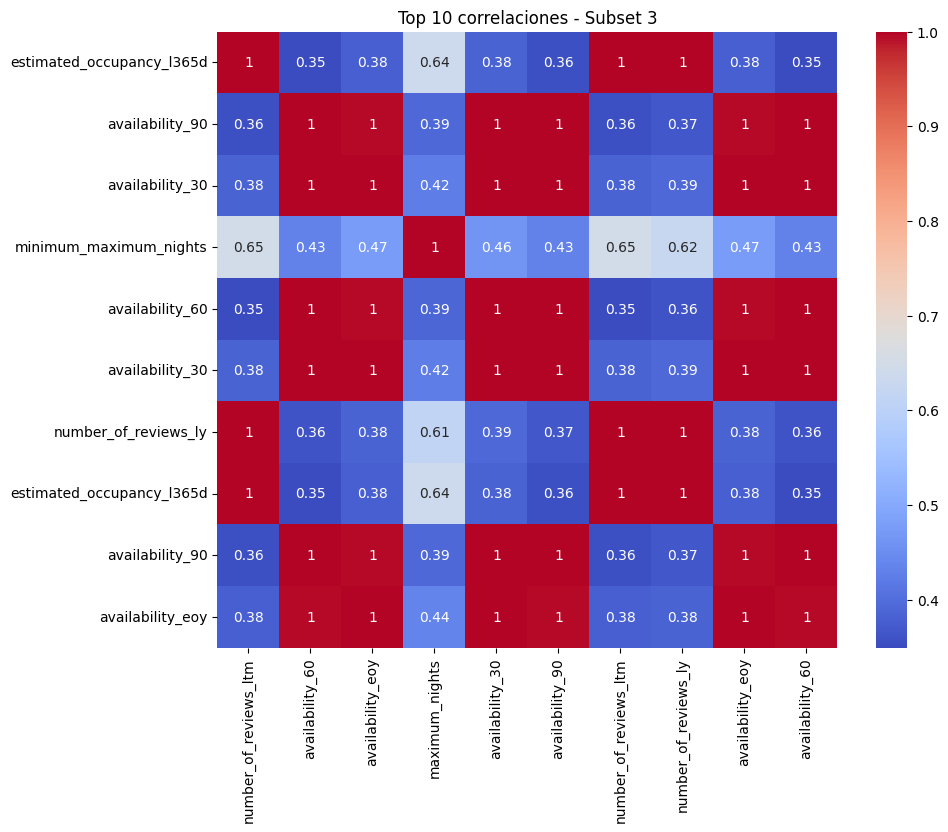

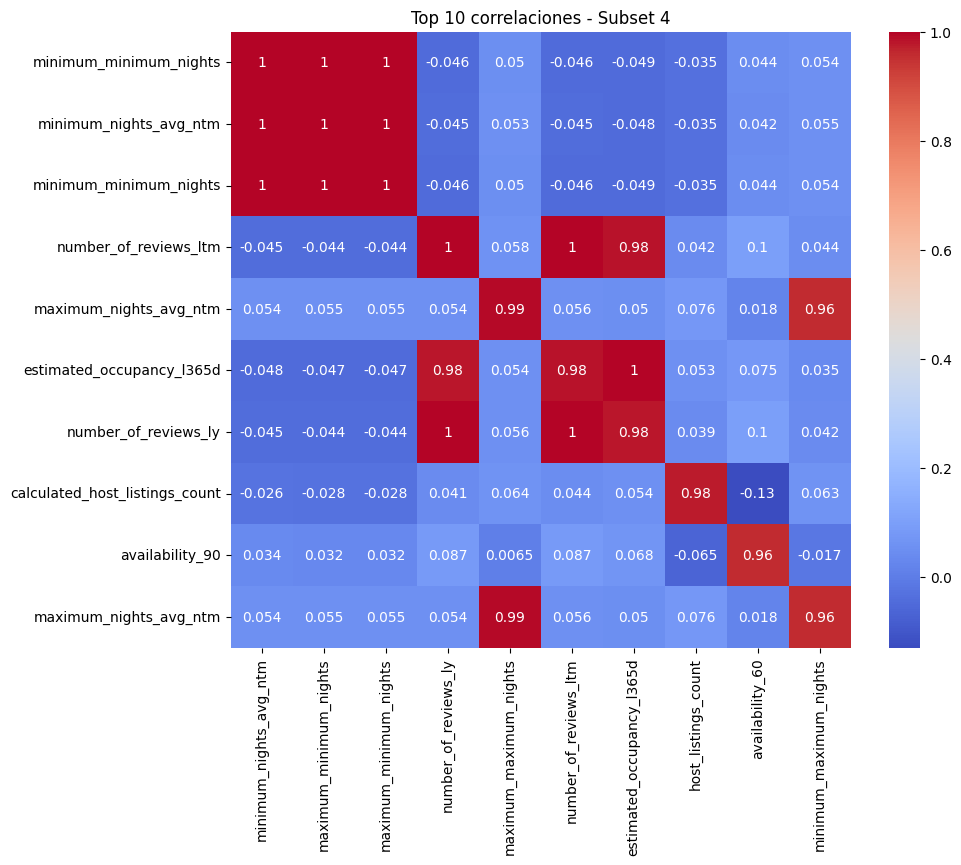

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

for i, subset in enumerate([Entire_home_apt, Private_room, Shared_room, Hotel_room], start=1):
    plt.figure(figsize=(10,8))
    corr = subset.corr(numeric_only=True)
    top_vars = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()[1:11].index
    sns.heatmap(corr.loc[top_vars.get_level_values(0), top_vars.get_level_values(1)], annot=True, cmap="coolwarm")
    plt.title(f"Top 10 correlaciones - Subset {i}")
    plt.show()

**REGRESIÓN MULTIPLE**

In [380]:
# Crear un DataFrame con solo las columnas numéricas
df_numeric = df.iloc[:, 14:].copy()

# (opcional) verificar
print(df_numeric.head())
print(df_numeric.info())


   host_is_superhost  host_response_rate  host_acceptance_rate  \
0                  1                 1.0                  0.94   
1                  0                 1.0                  1.00   
2                  0                 1.0                  1.00   
3                  0                 1.0                  0.00   
4                  1                 1.0                  1.00   

   host_listings_count  host_total_listings_count  latitude  longitude  \
0                    3                          3  35.33012   25.08012   
1                    4                          4  34.99533   24.75654   
2                    4                          4  35.51439   24.01793   
3                    1                          1  35.49648   23.69648   
4                   15                         15  35.39616   25.02541   

   accommodates  bathrooms  bedrooms  ...  review_scores_accuracy  \
0             3          2         1  ...                    4.94   
1             4     

In [381]:
Corr_Factors = df_numeric.corr()
Corr_Factors

,host_is_superhost,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
host_is_superhost,1.000000,0.117322,0.186152,-0.005286,-0.028356,0.094420,-0.098094,0.078804,-0.013702,0.069400,...,0.110448,0.081855,0.066622,0.086617,0.063536,0.087469,0.273805,0.270938,0.034948,0.283123
host_response_rate,0.117322,1.000000,0.303879,-0.007092,-0.031774,0.018094,-0.024490,0.005987,0.001624,0.014811,...,0.042624,0.019363,0.028967,0.043676,0.023276,0.027656,0.008593,0.017610,-0.066176,0.066760
host_acceptance_rate,0.186152,0.303879,1.000000,-0.131051,-0.100479,0.036776,-0.033262,-0.003758,-0.029311,-0.004375,...,0.035025,-0.006822,0.012721,0.024815,0.008099,0.014698,-0.040072,-0.035633,-0.035381,0.128849
host_listings_count,-0.005286,-0.007092,-0.131051,1.000000,0.883902,-0.010020,0.021776,0.192790,0.117701,0.190802,...,-0.020124,0.021878,0.000905,-0.041103,-0.028966,-0.000264,0.477791,0.462194,0.140061,-0.071688
host_total_listings_count,-0.028356,-0.031774,-0.100479,0.883902,1.000000,-0.007729,0.016547,0.154598,0.087067,0.151178,...,-0.017537,0.018655,-0.002192,-0.037391,-0.020671,0.000729,0.331442,0.319316,0.107208,-0.066128
latitude,0.094420,0.018094,0.036776,-0.010020,-0.007729,1.000000,-0.694588,0.076078,0.056169,0.076946,...,0.046477,0.031131,0.039983,0.028918,0.006596,0.045447,0.013723,0.011105,0.017107,0.069329
longitude,-0.098094,-0.024490,-0.033262,0.021776,0.016547,-0.694588,1.000000,-0.084003,-0.081636,-0.083565,...,-0.053971,-0.043985,-0.030761,-0.023591,-0.033449,-0.034513,-0.037957,-0.038548,0.003067,-0.025369
accommodates,0.078804,0.005987,-0.003758,0.192790,0.154598,0.076078,-0.084003,1.000000,0.298070,0.869506,...,0.048653,0.053878,0.035094,0.029887,-0.023050,0.043721,0.315509,0.327541,-0.069189,-0.151948
bathrooms,-0.013702,0.001624,-0.029311,0.117701,0.087067,0.056169,-0.081636,0.298070,1.000000,0.316798,...,0.021893,0.033192,0.012352,0.002869,-0.022273,0.017845,0.137525,0.142887,-0.031230,-0.115391
bedrooms,0.069400,0.014811,-0.004375,0.190802,0.151178,0.076946,-0.083565,0.869506,0.316798,1.000000,...,0.052447,0.053402,0.040469,0.029993,-0.018948,0.046747,0.296141,0.308233,-0.073633,-0.147638


REVIEW SCORES RATING

In [382]:
# Correlación de review_scores_rating con las demás
corr_review = Corr_Factors["review_scores_rating"].sort_values(ascending=True)

print(corr_review)


maximum_nights                                 -0.050627
longitude                                      -0.048758
calculated_host_listings_count_private_rooms   -0.046316
availability_eoy                               -0.033551
availability_365                               -0.031581
availability_90                                -0.025867
minimum_maximum_nights                         -0.018930
maximum_nights_avg_ntm                         -0.017708
maximum_maximum_nights                         -0.016690
minimum_minimum_nights                         -0.008391
availability_60                                -0.007885
host_listings_count                            -0.004135
host_total_listings_count                      -0.002542
minimum_nights_avg_ntm                         -0.002195
availability_30                                -0.000324
maximum_minimum_nights                          0.002282
minimum_nights                                  0.003429
number_of_reviews              

In [383]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['review_scores_value', 'review_scores_accuracy','review_scores_cleanliness']]
Var_Dep= df['review_scores_rating']

In [384]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [385]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [386]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_value', 'review_scores_accuracy',
        'review_scores_cleanliness'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.36586684, 0.29811591, 0.24483167]),
 'rank_': 3,
 'singular_': array([73.33173108, 28.62108579, 25.8887554 ]),
 'intercept_': np.float64(0.45342783792445474)}

**Modelo matemático: y= 0.36586684x1 + 0.29811591x2 + 0.24483167x3 + 0.45342783792445474**

In [387]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.74668338742635

In [390]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.74668338742635

In [391]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.8641084349931726)

HOST ACCEPTANCE RATE

In [ ]:
# Correlación de host_acceptance_rate con las demás
corr_review = Corr_Factors["host_acceptance_rate"].sort_values(ascending=True)

print(corr_review)

host_listings_count                            -0.131051
host_total_listings_count                      -0.100479
availability_30                                -0.081159
availability_365                               -0.077780
availability_60                                -0.068932
availability_90                                -0.068148
availability_eoy                               -0.062498
calculated_host_listings_count                 -0.040072
calculated_host_listings_count_entire_homes    -0.035633
calculated_host_listings_count_private_rooms   -0.035381
longitude                                      -0.033262
bathrooms                                      -0.029311
minimum_minimum_nights                         -0.017576
maximum_nights                                 -0.012241
beds                                           -0.010964
review_scores_cleanliness                      -0.006822
bedrooms                                       -0.004375
accommodates                   

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_response_rate', 'estimated_occupancy_l365d','number_of_reviews_ltm']]
Var_Dep= df['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'estimated_occupancy_l365d',
        'number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([5.11214998e-01, 5.36987789e-04, 3.55224976e-04]),
 'rank_': 3,
 'singular_': array([7567.40064324,  477.87741696,   17.72115414]),
 'intercept_': np.float64(0.41334873267873407)}

**Modelo matemático: y= 0.511215x1 + 0.0005369x2 + 0.0003552x3 + 0.4134387**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.11214344731839876

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.11214344731839876

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.3348782574584363)

HOST IS SUPERHOST

In [392]:
# Correlación de host_is_superhost con las demás
corr_review = Corr_Factors['host_is_superhost'].sort_values(ascending=True)

print(corr_review)

longitude                                      -0.098094
availability_365                               -0.064767
availability_90                                -0.061892
availability_eoy                               -0.054491
availability_60                                -0.037911
availability_30                                -0.034479
price                                          -0.031681
host_total_listings_count                      -0.028356
minimum_minimum_nights                         -0.021589
bathrooms                                      -0.013702
host_listings_count                            -0.005286
minimum_nights_avg_ntm                          0.028116
calculated_host_listings_count_private_rooms    0.034948
beds                                            0.048652
minimum_nights                                  0.052332
maximum_minimum_nights                          0.053887
review_scores_location                          0.063536
review_scores_checkin          

In [395]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['estimated_occupancy_l365d', 'number_of_reviews_ltm','number_of_reviews_ly']]
Var_Dep= df['host_is_superhost']

In [396]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [397]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [398]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['estimated_occupancy_l365d', 'number_of_reviews_ltm',
        'number_of_reviews_ly'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.00391894, -0.0050089 ,  0.00578542]),
 'rank_': 3,
 'singular_': array([7642.54318319,  668.47849505,   78.95802094]),
 'intercept_': np.float64(0.2747095829379519)}

**Modelo matemático: y =   0.00391894x1 − 0.0050089x2 + 0.00578542x3v + 0.27470958**

In [399]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.14509566191913426

In [400]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.14509566191913426

In [401]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.3809142448362023)

HOST TOTAL LISTINGS COUNT

In [402]:
# Correlación de host_total_listings_count con las demás
corr_review = Corr_Factors['host_total_listings_count'].sort_values(ascending=True)

print(corr_review)

host_acceptance_rate                           -0.100479
number_of_reviews                              -0.091609
number_of_reviews_ly                           -0.085771
number_of_reviews_ltm                          -0.085744
estimated_occupancy_l365d                      -0.084105
reviews_per_month                              -0.066128
minimum_maximum_nights                         -0.055028
review_scores_communication                    -0.037391
host_response_rate                             -0.031774
host_is_superhost                              -0.028356
review_scores_location                         -0.020671
review_scores_accuracy                         -0.017537
latitude                                       -0.007729
review_scores_rating                           -0.002542
review_scores_checkin                          -0.002192
review_scores_value                             0.000729
maximum_nights_avg_ntm                          0.005592
estimated_revenue_l365d        

In [403]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_listings_count', 'calculated_host_listings_count','calculated_host_listings_count_entire_homes']]
Var_Dep= df['host_total_listings_count']

In [404]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [405]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [406]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_listings_count', 'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 1.93402309, -1.32839793,  0.54813695]),
 'rank_': 3,
 'singular_': array([29745.39378123, 10851.08994998,   844.19139262]),
 'intercept_': np.float64(4.371349676731398)}

**Modelo matemático: y = 1.93402309x1 − 1.32839793x2 + 0.54813695x3 + 4.37134967**

In [407]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.7921039616902621

In [408]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.7921039616902621

In [409]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.8900022256659037)

ACCOMMODATES

In [410]:
# Correlación de accommodates con las demás
corr_review = Corr_Factors['accommodates'].sort_values(ascending=True)

print(corr_review)

reviews_per_month                              -0.151948
number_of_reviews_ltm                          -0.128232
number_of_reviews_ly                           -0.128092
number_of_reviews                              -0.126879
estimated_occupancy_l365d                      -0.084596
longitude                                      -0.084003
calculated_host_listings_count_private_rooms   -0.069189
availability_365                               -0.059945
availability_eoy                               -0.058626
review_scores_location                         -0.023050
availability_90                                -0.003956
host_acceptance_rate                           -0.003758
host_response_rate                              0.005987
minimum_minimum_nights                          0.020381
review_scores_communication                     0.029887
availability_30                                 0.034334
review_scores_checkin                           0.035094
availability_60                

In [411]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['bedrooms', 'beds','calculated_host_listings_count_entire_homes']]
Var_Dep= df['accommodates']

In [412]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [413]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [414]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'beds', 'calculated_host_listings_count_entire_homes'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([1.30107303, 0.29675875, 0.00284302]),
 'rank_': 3,
 'singular_': array([8900.22835385,  383.36441975,  143.61715536]),
 'intercept_': np.float64(1.2308789475894057)}

**Modelo matemático: y = 1.30107303x1 + 0.29675875x2 + 0.00284302x3 + 1.23087895**

In [415]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.7875878905451216

In [416]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.7875878905451216

In [417]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.887461486795411)

BEDROOMS

In [ ]:
# Correlación de bedrooms con las demás
corr_review = Corr_Factors['bedrooms'].sort_values(ascending=True)

print(corr_review)

reviews_per_month                              -0.147638
number_of_reviews                              -0.128689
number_of_reviews_ly                           -0.126263
number_of_reviews_ltm                          -0.126201
availability_eoy                               -0.086462
estimated_occupancy_l365d                      -0.084846
availability_365                               -0.084809
longitude                                      -0.083565
calculated_host_listings_count_private_rooms   -0.073633
availability_90                                -0.028598
review_scores_location                         -0.018948
host_acceptance_rate                           -0.004375
availability_30                                 0.011613
availability_60                                 0.011682
host_response_rate                              0.014811
minimum_minimum_nights                          0.023853
review_scores_communication                     0.029993
minimum_maximum_nights         

In [419]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['accommodates', 'beds','bathrooms']]
Var_Dep= df['bedrooms']

In [420]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [421]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [422]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'beds', 'bathrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.38701985, 0.10053383, 0.12411245]),
 'rank_': 3,
 'singular_': array([534.04460674, 199.63379689, 103.28112552]),
 'intercept_': np.float64(-0.37515964083866615)}

**Modelo matemático: y = 0.38701985x1 + 0.10053383x2 + 0.12411245x3 − 0.37515964**

In [423]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.770371652819586

In [424]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.770371652819586

In [425]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.877708182039786)

PRICE

In [ ]:
# Correlación de price con las demás
corr_review = Corr_Factors['price'].sort_values(ascending=True)

print(corr_review)

number_of_reviews_ltm                          -0.072430
number_of_reviews_ly                           -0.072267
number_of_reviews                              -0.071398
minimum_maximum_nights                         -0.070596
estimated_occupancy_l365d                      -0.066416
reviews_per_month                              -0.055167
host_is_superhost                              -0.031681
availability_365                               -0.024340
maximum_nights_avg_ntm                         -0.022387
availability_30                                -0.018164
availability_eoy                               -0.017042
availability_90                                -0.006542
availability_60                                -0.003426
calculated_host_listings_count_private_rooms   -0.001718
review_scores_location                          0.001371
maximum_maximum_nights                          0.001418
latitude                                        0.005507
host_response_rate             

In [428]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_total_listings_count', 'host_listings_count','bedrooms']]
Var_Dep= df['price']

In [429]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [430]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [431]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_total_listings_count', 'host_listings_count', 'bedrooms'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.76063554, -0.63731213, 76.02557798]),
 'rank_': 3,
 'singular_': array([65200.42058976, 12435.58008724,   228.27203082]),
 'intercept_': np.float64(41.87665588842793)}

**Modelo matemático: y = 0.76063554x1 - 0.63731213x2 + 76.02557798x3 + 41.87665588842793**

In [432]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.06301802093116393

In [433]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.06301802093116393

In [434]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.25103390394758224)

REVIEW SCORES VALUE

In [ ]:
# Correlación de review_scores_value con las demás
corr_review = Corr_Factors['review_scores_value'].sort_values(ascending=True)

print(corr_review)

maximum_nights                                 -0.057594
maximum_maximum_nights                         -0.040713
maximum_nights_avg_ntm                         -0.039333
minimum_maximum_nights                         -0.038306
calculated_host_listings_count_private_rooms   -0.035462
longitude                                      -0.034513
availability_eoy                               -0.034353
availability_90                                -0.029618
availability_365                               -0.028908
availability_60                                -0.016903
calculated_host_listings_count                 -0.010931
minimum_minimum_nights                         -0.010833
availability_30                                -0.009170
minimum_nights_avg_ntm                         -0.007887
calculated_host_listings_count_entire_homes    -0.005966
maximum_minimum_nights                         -0.004536
minimum_nights                                 -0.003381
host_listings_count            

In [437]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness']]
Var_Dep= df['review_scores_value']

In [438]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [439]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [440]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating', 'review_scores_accuracy',
        'review_scores_cleanliness'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.5811681 , 0.2420597 , 0.16440353]),
 'rank_': 3,
 'singular_': array([71.34791951, 28.50569464, 21.19761075]),
 'intercept_': np.float64(0.008895974788782013)}

**Modelo matemático: y = 0.5811681x1 + 0.2420597x2 + 0.16440353x3 + 0.0088959747**

In [441]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.6791529776853665

In [442]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.6791529776853665

In [443]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.8241073823752378)

BATHROOMS

In [444]:
# Correlación de bathrooms con las demás
corr_review = Corr_Factors['bathrooms'].sort_values(ascending=True)

print(corr_review)

availability_eoy                               -0.160342
availability_365                               -0.153663
reviews_per_month                              -0.115391
availability_90                                -0.102394
number_of_reviews_ltm                          -0.102253
number_of_reviews_ly                           -0.101711
number_of_reviews                              -0.091459
longitude                                      -0.081636
availability_60                                -0.069645
estimated_occupancy_l365d                      -0.067185
availability_30                                -0.054916
calculated_host_listings_count_private_rooms   -0.031230
host_acceptance_rate                           -0.029311
review_scores_location                         -0.022273
host_is_superhost                              -0.013702
host_response_rate                              0.001624
minimum_maximum_nights                          0.002595
review_scores_communication    

In [445]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['bedrooms', 'accommodates','beds']]
Var_Dep= df['bathrooms']

In [446]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [447]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [448]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'accommodates', 'beds'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.10552425, 0.01860939, 0.01042171]),
 'rank_': 3,
 'singular_': array([571.40572544, 202.27058867, 103.32056148]),
 'intercept_': np.float64(1.1501478747381557)}

**Modelo matemático: y = 0.10552425x1 + 0.01860939x2 + 0.01042171x3 + 1.1501478747**

In [449]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.1029614918131021

In [450]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.1029614918131021

In [451]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.32087613157276457)

REVIEWS PER MONTH 

In [452]:
# Correlación de reviews_per_mont con las demás
corr_review = Corr_Factors['reviews_per_month'].sort_values(ascending=True)

print(corr_review)

accommodates                                   -0.151948
beds                                           -0.150064
bedrooms                                       -0.147638
bathrooms                                      -0.115391
host_listings_count                            -0.071688
host_total_listings_count                      -0.066128
maximum_nights                                 -0.057303
price                                          -0.055167
calculated_host_listings_count                 -0.055090
calculated_host_listings_count_entire_homes    -0.049751
calculated_host_listings_count_private_rooms   -0.040014
availability_90                                -0.036954
minimum_nights_avg_ntm                         -0.035909
minimum_minimum_nights                         -0.032055
availability_60                                -0.030963
maximum_minimum_nights                         -0.028133
longitude                                      -0.025369
minimum_nights                 

In [453]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['number_of_reviews_ltm', 'number_of_reviews_ly','estimated_occupancy_l365d']]
Var_Dep= df['reviews_per_month']

In [454]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [455]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [456]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews_ly',
        'estimated_occupancy_l365d'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.07681527, -0.00501325, -0.00103791]),
 'rank_': 3,
 'singular_': array([7642.54318319,  668.47849505,   78.95802094]),
 'intercept_': np.float64(0.18546741831748226)}

**Modelo matemático: y =  0.07681527x1 - 0.00501325x2 - 0.00103791x3 + 0.185467418**

In [457]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.7726080940106348

In [458]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.7726080940106348

In [459]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.8789812819455456)